# Data Ulasan Playstore

In [37]:
import pandas as pd

# Membaca file CSV langsung dari direktori saat ini
df = pd.read_csv("review_byond_playstore.csv")

# Menampilkan DataFrame
df.head()

,Review ID,Username,Rating,Review Text,Date
0,6b4af182-7d0a-4b24-a406-b6858709709a,Pengguna Google,5,"menurut saya aplikasi ini sudah cukup baik, fi...",2025-09-16 02:55:03
1,3dd1dc9b-4c11-4d83-86f7-7e81a071237b,Pengguna Google,5,"aplikasi ini fiturnya lengkap,bisa bayar semua...",2025-09-16 02:51:01
2,ec205cfe-9a74-46e3-9139-40a3dd08a246,Pengguna Google,5,Sangat Membantu untuk Keperluan Sehari hari,2025-09-16 02:45:16
3,ca80546d-2e6f-4c94-9000-d6c19d9079f7,Pengguna Google,1,Aplikasi belum ready atau system yang belum re...,2025-09-16 02:43:21
4,d660254a-9834-4184-94a5-a6704ed80e5e,Pengguna Google,5,semoga bermanfaat,2025-09-16 02:41:37


In [38]:
df_filtered = df.copy()

In [39]:
# Cek Struktur DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44832 entries, 0 to 44831
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    44832 non-null  object
 1   Username     44832 non-null  object
 2   Rating       44832 non-null  int64 
 3   Review Text  44832 non-null  object
 4   Date         44832 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [40]:
df.shape

(44832, 5)

In [41]:
# Cek Nilai Kosong atau Missing Value
df.isnull().sum()

Review ID      0
Username       0
Rating         0
Review Text    0
Date           0
dtype: int64

In [43]:
# Cek dan hapus duplikasi data
# Jumlah duplikat
df.duplicated().sum()

np.int64(0)

In [44]:
# Hapus duplikat
df = df.drop_duplicates()

df.shape

(44832, 5)

# Modify

In [25]:
!pip install pandas numpy

In [26]:
import pandas as pd
import numpy as np
import re
import string

## Case Folding

In [27]:
# Mengganti nama kolom 'full_text' menjadi 'comment'
df_filtered = df_filtered.rename(columns={'Review Text': 'comment'})

# Membuat kolom baru hasil case folding dari kolom 'comment'
df_filtered['case_folding'] = df_filtered['comment'].astype(str).str.lower()

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding']]

# Cek 10 baris awal
df_filtered.head(10)

,comment,case_folding
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi..."
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...
4,semoga bermanfaat,semoga bermanfaat
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...


## Cleaning

In [28]:
import re

# Fungsi untuk menghapus username (@user)
def remove_username(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@[^\s]+', '', text)
    return text

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U0001F004-\U0001F0CF"
            u"\U0001F1E0-\U0001F1FF"
            "]+",
            flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'\d+', '', tweet)
    return tweet


# 🧩 Terapkan Cleaning
df_filtered['cleaning'] = (
    df_filtered['case_folding']
    .apply(remove_username)
    .apply(remove_emoji)
    .apply(remove_symbols)
    .apply(remove_numbers)
)

# 📋 Urutkan Kolom Agar Rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning']]

# 🔍 Tampilkan 10 baris awal
df_filtered.head(10)

,comment,case_folding,cleaning
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...


## Normalisasi Kata

In [29]:
# Tahap Normalisasi Kata
import pandas as pd
import re

# Baca kamus kata baku dari file Excel
kamus = pd.read_excel("kamuskatabaku.xlsx")

# Normalisasi key agar selalu lowercase
kamus['tidak_baku'] = kamus['tidak_baku'].astype(str).str.lower()
kamus['kata_baku']   = kamus['kata_baku'].astype(str).str.lower()

# Buat dictionary normalisasi
kamus_dict = dict(zip(kamus['tidak_baku'], kamus['kata_baku']))

# Fungsi normalisasi teks
def normalize_text(text):
    if text is None or not isinstance(text, str):
        return text

    # Hilangkan spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    if text == "":
        return text

    words = text.split()
    normalized_words = [kamus_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi pada kolom 'cleaning'
df_filtered['normalisasi'] = df_filtered['cleaning'].apply(normalize_text)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi']]

# Tampilkan hasil
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...


## Tokenisasi Kata

In [30]:
# Tahap Tokenisasi
import re

def tokenize(text):
    if text is None or not isinstance(text, str):
        return []
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Terapkan tokenisasi pada kolom 'normalisasi'
df_filtered['tokenisasi'] = df_filtered['normalisasi'].apply(tokenize)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi']]

# Tampilkan 10 baris pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b..."
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h..."
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b..."
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]"
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,..."
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang..."
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,..."
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san..."
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer..."


## Stopword Removal

In [31]:
# Tahap Stopword Removal
import nltk
from nltk.corpus import stopwords

# Download stopwords Indonesia (sekali saja)
nltk.download('stopwords')

# Stopword dasar NLTK
stop_words = set(stopwords.words('indonesian'))

# Stopword tambahan yang aman (NETRAL, TIDAK berpengaruh sentimen)
custom_stopwords = {
    'bsi', 'byond', 'bank',
    'assalamualaikum', 'halo', 'hai',
    'kak', 'kakak', 'anda', 'kami', 'kita',
    'maaf', 'mohon', 'tolong',
    'info', 'informasi', 'cs', 'admin',
    'terimakasih', 'trimakasih', 'makasih'
}

stop_words.update(custom_stopwords)

# Penting: kata sentimen NEGATIF jangan dihapus
words_to_keep = {
    "tidak", "bukan", "kurang",
    "masalah", "pengaduan", "gagal", "error",
    "gangguan", "lambat", "buruk", "parah"
}

stop_words = stop_words - words_to_keep    # hapus dari daftar stopword

# Fungsi Stopword Removal versi aman
def remove_stopwords(tokens):
    if tokens is None:
        return tokens

    cleaned = []
    for word in tokens:
        if word not in stop_words and len(word) > 2:
            cleaned.append(word)
    return cleaned

# Terapkan ke dataframe
df_filtered['stopword_removal'] = df_filtered['tokenisasi'].apply(remove_stopwords)

# Kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal']]

df_filtered.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b...","[aplikasi, fitur, lumayan, lengkap]"
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ...","[aplikasi, fiturnya, lengkapbisa, bayar, aplik..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h...","[membantu, keperluan, sehari]"
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b...","[aplikasi, ready, system, ready, sihselalu, ma..."
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]","[semoga, bermanfaat]"
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,...","[membantu, transaksi, fiturnya]"
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang...","[pas, banget, akun, belajar, menabung, digital..."
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,...","[membantu, transaksi, seharihari, lancar, prak..."
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san...","[aplikasi, aplikasi, bagus, fitur, lengkap, mu..."
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer...","[aplikasi, kecewa, developer, meningkatkan]"


## Stemming

In [32]:
!pip install Sastrawi

In [33]:
# Stopword Removal — Versi Aman (Tidak Agresif)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming aman
def apply_stemming(token_list):
    if token_list is None:
        return token_list
    if not isinstance(token_list, list):
        return token_list
    return [stemmer.stem(word) for word in token_list]

# Terapkan pada dataframe
df_filtered['stemming'] = df_filtered['stopword_removal'].apply(apply_stemming)

# Susun kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming']]

df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b...","[aplikasi, fitur, lumayan, lengkap]","[aplikasi, fitur, lumayan, lengkap]"
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ...","[aplikasi, fiturnya, lengkapbisa, bayar, aplik...","[aplikasi, fiturnya, lengkapbisa, bayar, aplik..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h...","[membantu, keperluan, sehari]","[bantu, perlu, hari]"
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b...","[aplikasi, ready, system, ready, sihselalu, ma...","[aplikasi, ready, system, ready, sihselalu, ma..."
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]","[semoga, bermanfaat]","[moga, manfaat]"
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,...","[membantu, transaksi, fiturnya]","[bantu, transaksi, fiturnya]"
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang...","[pas, banget, akun, belajar, menabung, digital...","[pas, banget, akun, ajar, tabung, digital, coc..."
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,...","[membantu, transaksi, seharihari, lancar, prak...","[bantu, transaksi, seharihari, lancar, praktis..."
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san...","[aplikasi, aplikasi, bagus, fitur, lengkap, mu...","[aplikasi, aplikasi, bagus, fitur, lengkap, mu..."
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer...","[aplikasi, kecewa, developer, meningkatkan]","[aplikasi, kecewa, developer, tingkat]"


In [17]:
# Export data yang sudah dimodify ke CSV
df_filtered.to_csv("hasil_modify_playstore.csv", index=False)

print("✅ File berhasil diekspor sebagai 'hasil_modify_playstore.csv'")

✅ File berhasil diekspor sebagai 'hasil_modify_playstore.csv'


# Model

In [5]:
import pandas as pd
import ast

df_modified = pd.read_csv("hasil_modify_playstore.csv")

# cek kolom
print(df_modified.columns.tolist())

# hanya proses kolom yang tersedia
cols_to_convert = ['tokenisasi', 'stopword_removal', 'stemming']

for col in cols_to_convert:
    if col in df_modified.columns:
        df_modified[col] = df_modified[col].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )
    else:
        print(f"Kolom '{col}' tidak ditemukan")

# filter kolom yang ada saja
df_filtered = df_modified[
    [col for col in [
        'comment',
        'case_folding',
        'cleaning',
        'normalisasi',
        'tokenisasi',
        'stopword_removal',
        'stemming'
    ] if col in df_modified.columns]
]

df_filtered.head(10)

['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi', 'stopword_removal']
Kolom 'stemming' tidak ditemukan


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b...","[aplikasi, fitur, lumayan, lengkap]"
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ...","[aplikasi, fiturnya, lengkapbisa, bayar, aplik..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h...","[membantu, keperluan, sehari]"
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b...","[aplikasi, ready, system, ready, sihselalu, ma..."
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]","[semoga, bermanfaat]"
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,...","[membantu, transaksi, fiturnya]"
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang...","[pas, banget, akun, belajar, menabung, digital..."
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,...","[membantu, transaksi, seharihari, lancar, prak..."
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san...","[aplikasi, aplikasi, bagus, fitur, lengkap, mu..."
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer...","[aplikasi, kecewa, developer, meningkatkan]"


## Pelabelan dengan Lexicon

In [6]:
import pandas as pd

# rapikan nama kolom
df_filtered.columns = df_filtered.columns.str.strip()

# pilih kolom token terbaik yang tersedia
token_col = None
for c in ['stemming', 'stopword_removal', 'tokenisasi']:
    if c in df_filtered.columns:
        token_col = c
        break

if token_col is None:
    raise KeyError("Tidak ada kolom token yang bisa dipakai: 'stemming', 'stopword_removal', atau 'tokenisasi'.")

print("Pakai kolom untuk sentimen:", token_col)

# 1. Load lexicon positif dan negatif
pos_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
neg_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

pos_lexicon = set(pd.read_csv(pos_url, sep="\t", header=None)[0])
neg_lexicon = set(pd.read_csv(neg_url, sep="\t", header=None)[0])

# 2. Fungsi menghitung skor & sentimen (Tanpa Netral)
def get_sentiment(tokens):
    if not isinstance(tokens, list):
        return 0, "Negatif"

    pos_count = sum(1 for word in tokens if word in pos_lexicon)
    neg_count = sum(1 for word in tokens if word in neg_lexicon)

    score = pos_count - neg_count
    sentiment = "Positif" if score > 0 else "Negatif"
    return score, sentiment

# 3. Terapkan ke kolom token yang ada
df_filtered[['score', 'sentiment_label']] = df_filtered[token_col].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# 4. (Opsional) Buang semua score 0
df_filtered = df_filtered[df_filtered['score'] != 0].reset_index(drop=True)

df_filtered.head(10)

Pakai kolom untuk sentimen: stopword_removal


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,score,sentiment_label
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b...","[aplikasi, fitur, lumayan, lengkap]",-1,Negatif
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ...","[aplikasi, fiturnya, lengkapbisa, bayar, aplik...",-2,Negatif
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h...","[membantu, keperluan, sehari]",1,Positif
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b...","[aplikasi, ready, system, ready, sihselalu, ma...",1,Positif
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]","[semoga, bermanfaat]",1,Positif
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,...","[membantu, transaksi, fiturnya]",1,Positif
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang...","[pas, banget, akun, belajar, menabung, digital...",5,Positif
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,...","[membantu, transaksi, seharihari, lancar, prak...",2,Positif
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san...","[aplikasi, aplikasi, bagus, fitur, lengkap, mu...",-2,Negatif
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer...","[aplikasi, kecewa, developer, meningkatkan]",-1,Negatif


### Distribusi Sentimen Menggunakan 2 Kelas

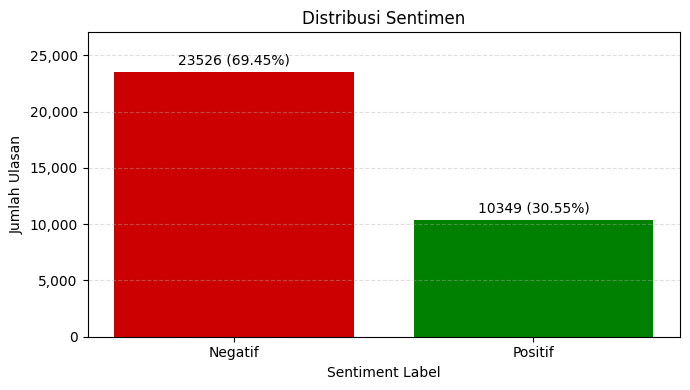

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hitung distribusi label
dist = df_filtered['sentiment_label'].value_counts().reset_index()
dist.columns = ['sentiment_label', 'jumlah']

# Hitung persentase
dist['persentase'] = (dist['jumlah'] / dist['jumlah'].sum() * 100).round(2)

# Urutkan label
dist = dist.sort_values('sentiment_label')

# Warna khusus:
# Positif = Hijau Muda (#90ee90)
# Negatif = Merah Muda (#ff9999)
colors = dist['sentiment_label'].map({
    'Positif': '#008000',   # hijau gelap
    'Negatif': '#cc0000'    # merah gelap
}).tolist()

# Plot
plt.figure(figsize=(7, 4))
plt.bar(dist['sentiment_label'], dist['jumlah'], color=colors)

# Format angka ribuan
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Grid halus
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Tambah ruang di atas bar
plt.ylim(0, dist['jumlah'].max() * 1.15)

# Label dan judul
plt.xlabel('Sentiment Label')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Sentimen')

# Tampilkan angka + persentase
for index, row in dist.iterrows():
    plt.text(index,
             row['jumlah'] + dist['jumlah'].max() * 0.03,
             f"{row['jumlah']} ({row['persentase']}%)",
             ha='center')

plt.tight_layout()
plt.show()

### Konversi Label Teks ke Label Numerik

Bagian kode ini digunakan untuk mengubah label sentimen yang semula berbentuk teks ("Positif" dan "Negatif") menjadi angka (1 dan 0). Model NLP seperti IndoBERT hanya dapat memproses label dalam bentuk numerik, sehingga proses mapping ini wajib dilakukan sebelum training.

In [8]:
label_mapping = {
    "Positif": 1,
    "Negatif": 0
}

df_filtered['sentiment_encoded'] = df_filtered['sentiment_label'].map(label_mapping)

# Cek hasil 10 data pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,score,sentiment_label,sentiment_encoded
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b...","[aplikasi, fitur, lumayan, lengkap]",-1,Negatif,0
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ...","[aplikasi, fiturnya, lengkapbisa, bayar, aplik...",-2,Negatif,0
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h...","[membantu, keperluan, sehari]",1,Positif,1
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b...","[aplikasi, ready, system, ready, sihselalu, ma...",1,Positif,1
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]","[semoga, bermanfaat]",1,Positif,1
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,...","[membantu, transaksi, fiturnya]",1,Positif,1
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang...","[pas, banget, akun, belajar, menabung, digital...",5,Positif,1
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,...","[membantu, transaksi, seharihari, lancar, prak...",2,Positif,1
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san...","[aplikasi, aplikasi, bagus, fitur, lengkap, mu...",-2,Negatif,0
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer...","[aplikasi, kecewa, developer, meningkatkan]",-1,Negatif,0


### Contoh 5 Data Positif dan Negatif

In [9]:
# === Contoh 5 Data Positif ===
contoh_positif = (
    df_filtered[df_filtered['sentiment_encoded'] == 1]
    .head(5)
)

print("=== Contoh Ulasan Positif ===")
display(contoh_positif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])


# === Contoh 5 Data Negatif ===
contoh_negatif = (
    df_filtered[df_filtered['sentiment_encoded'] == 0]
    .head(5)
)

print("=== Contoh Ulasan Negatif ===")
display(contoh_negatif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])

=== Contoh Ulasan Positif ===


,normalisasi,sentiment_label,sentiment_encoded
2,sangat membantu untuk keperluan sehari hari,Positif,1
3,aplikasi belum ready atau system yang belum re...,Positif,1
4,semoga bermanfaat,Positif,1
5,sangat membantu saat melakukan transaksi di lu...,Positif,1
6,byond by bsi pas banget buat akun yang sedang ...,Positif,1


=== Contoh Ulasan Negatif ===


,normalisasi,sentiment_label,sentiment_encoded
0,menurut saya aplikasi ini sudah cukup baik fit...,Negatif,0
1,aplikasi ini fiturnya lengkapbisa bayar semua ...,Negatif,0
8,aplikasi byond by bsi aplikasi yang sangat bag...,Negatif,0
9,aplikasi ya kecewa mohon untuk developer lebih...,Negatif,0
12,aplikasi yang bagus,Negatif,0


### Wordcloud Positif dan Negatif

#### Wordcloud Positif

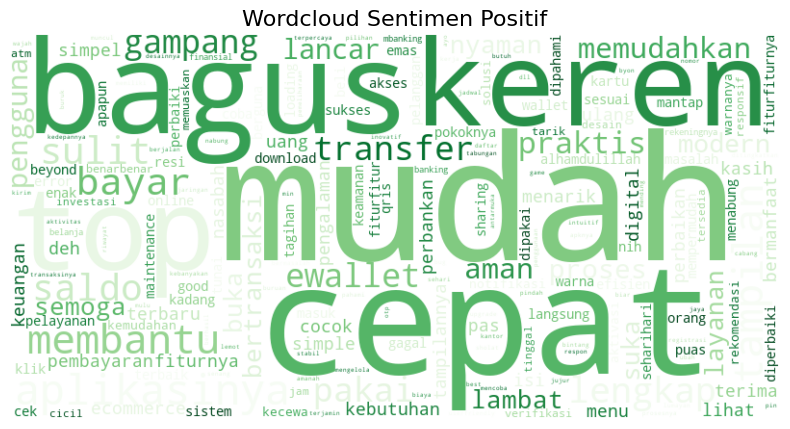

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# stopword tambahan
stopword_wc = {
    "bsi", "byond", "bank", "syariah",
    "aplikasi", "apk", "byondbybsi",
    "nya", "juga", "udah",
    "gak", "ga", "cont", "tidak",
    "sih", "saja", "aja",
    "untuk", "banget", "kali",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update",
    "customer", "service", "cs",
    "fitur", "login", "akun", "email",
    "transaksi", "rekening", "mobile"
}

wc_stopwords = STOPWORDS.union(stopword_wc)

# ambil token positif
positive_tokens = df_filtered[
    df_filtered['sentiment_encoded'] == 1
][token_col]

# pastikan isinya list
positive_tokens = positive_tokens.dropna().apply(
    lambda x: x if isinstance(x, list) else []
)

# gabungkan token
text_pos = " ".join(" ".join(tokens) for tokens in positive_tokens)

# wordcloud
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greens",
    stopwords=wc_stopwords,
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Wordcloud Sentimen Positif", fontsize=16)
plt.axis("off")
plt.show()

#### 5 Kata Teratas

In [22]:
from collections import Counter
import pandas as pd
from wordcloud import STOPWORDS

# minimal stopwords kalau wc_stopwords belum ada
if 'wc_stopwords' not in globals():
    wc_stopwords = STOPWORDS

# rapikan nama kolom
df_filtered.columns = df_filtered.columns.str.strip()

# pastikan sentiment_encoded ada
if 'sentiment_encoded' not in df_filtered.columns:
    if 'sentiment_label' in df_filtered.columns:
        df_filtered['sentiment_encoded'] = df_filtered['sentiment_label'].map({'Positif': 1, 'Negatif': 0})
    else:
        raise KeyError("Tidak ada kolom 'sentiment_encoded' atau 'sentiment_label'.")

# pilih kolom token
token_col = None
for c in ['stemming', 'stopword_removal', 'tokenisasi']:
    if c in df_filtered.columns:
        token_col = c
        break
if token_col is None:
    raise KeyError("Tidak ada kolom token: 'stemming', 'stopword_removal', atau 'tokenisasi'.")

# 1. Ambil data sentimen positif
data_positif = df_filtered.loc[df_filtered['sentiment_encoded'] == 1, token_col]

# 2. Pastikan tiap baris benar-benar list token
data_positif = data_positif.dropna().apply(lambda x: x if isinstance(x, list) else [])

# 3. Gabungkan seluruh token + filter stopword + panjang kata
all_words = [
    word
    for tokens in data_positif
    for word in tokens
    if isinstance(word, str) and word not in wc_stopwords and len(word) > 2
]

# 4. Hitung frekuensi & ambil top 5
top_5_words = Counter(all_words).most_common(5)

# 5. Tabel hasil
df_top_5 = pd.DataFrame(top_5_words, columns=['kata', 'jumlah_kemunculan'])
df_top_5

,kata,jumlah_kemunculan
0,mudah,2335
1,cepat,1795
2,bagus,1468
3,keren,1351
4,top,1243


#### Wordcloud Negatif

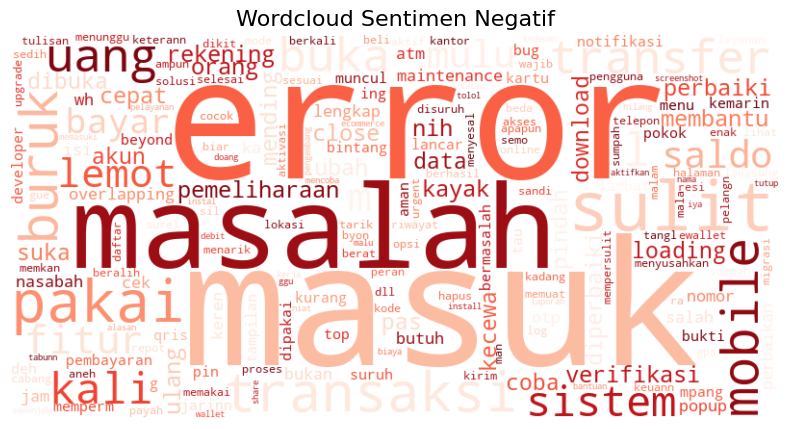

In [19]:
# === Wordcloud Negatif ===
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Stopword tambahan khusus wordcloud (hindari kata tidak bermakna)
stopword_wc = {
    "bsi", "byond", "byond!", "bank", "syariah",
    "aplikasi", "apk", 'tidak',
    "nya", "juga", "udah", "bagus",
    "gak", "ga", "cont", "min",
    "sih", "saja", "aja",
    "untuk", "banget", "mengataskanamakan",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update"
}

# Gabungkan token negatif menjadi satu teks panjang
text_neg = " ".join(
    [" ".join(tokens) for tokens in df_filtered[df_filtered['sentiment_encoded'] == 0]['stopword_removal']]
)

# Hapus kata tidak penting
for sw in stopword_wc:
    text_neg = text_neg.replace(sw, "")

# Generate WordCloud negatif
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",       # warna merah lembut → cocok untuk negatif
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_neg)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Wordcloud Sentimen Negatif", fontsize=16)
plt.axis("off")
plt.show()

#### 5 Kata Teratas

In [20]:
from collections import Counter
import pandas as pd

# 1. Ambil data sentimen negatif
data_negatif = df_filtered[
    df_filtered['sentiment_encoded'] == 0
]['stopword_removal']

# 2. Gabungkan seluruh token
all_words_neg = [
    word
    for tokens in data_negatif
    for word in tokens
    if word not in stopword_wc and len(word) > 2
]

# 3. Hitung frekuensi kata
word_freq_neg = Counter(all_words_neg)

# 4. Ambil 5 kata teratas
top_5_words_neg = word_freq_neg.most_common(5)

# 5. Jadikan tabel
df_top_5_neg = pd.DataFrame(
    top_5_words_neg,
    columns=['kata', 'jumlah_kemunculan']
)

df_top_5_neg

,kata,jumlah_kemunculan
0,masuk,4207
1,error,4073
2,masalah,3546
3,sulit,3025
4,pakai,2839


# Data Ulasan Appstore

In [47]:
import pandas as pd

# Membaca file CSV langsung dari direktori saat ini
df = pd.read_csv("reviews_byond_appstore.csv")

# Menampilkan DataFrame
df.head()

,Author,Title,Content,Rating,Date
0,Bani lah sama mu,QRIS tidak bisa dipakai,"QRIS sangat lemot, antrian panjang gara-gara a...",2,2024-05-13T07:50:00-07:00
1,YogaPratama7501,Proses lambat,Saya suka dengan fitur cicil emas yang sangat ...,3,2025-02-08T13:56:00-07:00
2,Nopppal,Tampilan keren,"Beberapa kali aplikasi crash, semoga bisa sege...",1,2024-08-23T17:45:00-07:00
3,mardhadha,Tidak stabil,"Aplikasi sering lemot saat jam sibuk, agak men...",2,2025-03-26T10:47:00-07:00
4,Bintang07,Suka banget aplikasinya,Proses transaksi berjalan lancar dan cepat.,3,2024-06-18T23:05:00-07:00


In [48]:
df_filtered = df.copy()

In [49]:
# Cek Struktur DataFrame
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Author   10000 non-null  object
 1   Title    10000 non-null  object
 2   Content  10000 non-null  object
 3   Rating   10000 non-null  int64 
 4   Date     10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [50]:
df_filtered.shape

(10000, 5)

In [51]:
# Cek jumlah nilai null per kolom
null_count = df_filtered.isnull().sum()
print("Jumlah nilai null per kolom:")
print(null_count)

Jumlah nilai null per kolom:
Author     0
Title      0
Content    0
Rating     0
Date       0
dtype: int64


In [52]:
# Simpan jumlah data sebelum hapus null
before_null = df_filtered.shape[0]

# Hapus baris yang memiliki minimal 1 nilai null
df_filtered = df_filtered.dropna().reset_index(drop=True)

after_null = df_filtered.shape[0]

print(f"Data sebelum hapus null : {before_null}")
print(f"Data sesudah hapus null : {after_null}")
print(f"Jumlah baris dihapus   : {before_null - after_null}")

Data sebelum hapus null : 10000
Data sesudah hapus null : 10000
Jumlah baris dihapus   : 0


In [53]:
# Cek duplikasi berdasarkan isi ulasan
dup_count = df_filtered.duplicated(subset=['Content']).sum()
print(f"Jumlah duplikasi berdasarkan Content: {dup_count}")

Jumlah duplikasi berdasarkan Content: 9975


In [54]:
# Simpan jumlah data sebelum hapus duplikat
before_dup = df_filtered.shape[0]

# Hapus duplikasi berdasarkan Content
df_filtered = df_filtered.drop_duplicates(subset=['Content']).reset_index(drop=True)

after_dup = df_filtered.shape[0]

print(f"Data sebelum hapus duplikat : {before_dup}")
print(f"Data sesudah hapus duplikat : {after_dup}")
print(f"Jumlah duplikat dihapus     : {before_dup - after_dup}")

Data sebelum hapus duplikat : 10000
Data sesudah hapus duplikat : 25
Jumlah duplikat dihapus     : 9975


# Modify

In [55]:
!pip install pandas numpy

In [56]:
import pandas as pd
import numpy as np
import re
import string

## Case Folding

In [57]:
# Mengganti nama kolom 'full_text' menjadi 'comment'
df_filtered = df_filtered.rename(columns={'Content': 'comment'})

# Membuat kolom baru hasil case folding dari kolom 'comment'
df_filtered['case_folding'] = df_filtered['comment'].astype(str).str.lower()

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding']]

# Cek 10 baris awal
df_filtered.head(10)

,comment,case_folding
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a..."
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege..."
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men..."
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras..."
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta..."
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika..."
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien."


In [58]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment       25 non-null     object
 1   case_folding  25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


## Cleaning

In [59]:
import re

# Fungsi untuk menghapus username (@user)
def remove_username(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@[^\s]+', '', text)
    return text

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U0001F004-\U0001F0CF"
            u"\U0001F1E0-\U0001F1FF"
            "]+",
            flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'\d+', '', tweet)
    return tweet


# 🧩 Terapkan Cleaning
df_filtered['cleaning'] = (
    df_filtered['case_folding']
    .apply(remove_username)
    .apply(remove_emoji)
    .apply(remove_symbols)
    .apply(remove_numbers)
)

# 📋 Urutkan Kolom Agar Rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning']]

# 🔍 Tampilkan 10 baris awal
df_filtered.head(10)

,comment,case_folding,cleaning
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras...",sistem keamanan cukup baik membuat saya merasa...
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta...",transaksi qris selalu error saldo kepotong tap...
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika...",fitur qris jarang dipakai tapi overall aplikas...
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien.",bagus sekali transaksi jadi lebih efisien


In [60]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment       25 non-null     object
 1   case_folding  25 non-null     object
 2   cleaning      25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


## Normalisasi Kata

In [61]:
# Tahap Normalisasi Kata
import pandas as pd
import re

# Baca kamus kata baku dari file Excel
kamus = pd.read_excel("kamuskatabaku.xlsx")

# Normalisasi key agar selalu lowercase
kamus['tidak_baku'] = kamus['tidak_baku'].astype(str).str.lower()
kamus['kata_baku']   = kamus['kata_baku'].astype(str).str.lower()

# Buat dictionary normalisasi
kamus_dict = dict(zip(kamus['tidak_baku'], kamus['kata_baku']))

# Fungsi normalisasi teks
def normalize_text(text):
    if text is None or not isinstance(text, str):
        return text

    # Hilangkan spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    if text == "":
        return text

    words = text.split()
    normalized_words = [kamus_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi pada kolom 'cleaning'
df_filtered['normalisasi'] = df_filtered['cleaning'].apply(normalize_text)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi']]

# Tampilkan hasil
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...,qris sangat lemot antrian panjang garagara apl...
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...,beberapa kali aplikasi crash semoga bisa seger...
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...,aplikasi sering lemot saat jam sibuk agak meng...
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat,proses transaksi berjalan lancar dan cepat
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras...",sistem keamanan cukup baik membuat saya merasa...,sistem keamanan cukup baik membuat saya merasa...
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta...",transaksi qris selalu error saldo kepotong tap...,transaksi qris selalu error saldo kepotong tap...
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika...",fitur qris jarang dipakai tapi overall aplikas...,fitur qris jarang dipakai tapi overall aplikas...
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien.",bagus sekali transaksi jadi lebih efisien,bagus sekali transaksi jadi lebih efisien


In [62]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment       25 non-null     object
 1   case_folding  25 non-null     object
 2   cleaning      25 non-null     object
 3   normalisasi   25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes


## Tokenisasi Kata

In [63]:
# Tahap Tokenisasi
import re

def tokenize(text):
    if text is None or not isinstance(text, str):
        return []
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Terapkan tokenisasi pada kolom 'normalisasi'
df_filtered['tokenisasi'] = df_filtered['normalisasi'].apply(tokenize)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi']]

# Tampilkan 10 baris pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...,qris sangat lemot antrian panjang garagara apl...,"[qris, sangat, lemot, antrian, panjang, garaga..."
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,"[saya, suka, dengan, fitur, cicil, emas, yang,..."
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...,beberapa kali aplikasi crash semoga bisa seger...,"[beberapa, kali, aplikasi, crash, semoga, bisa..."
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...,aplikasi sering lemot saat jam sibuk agak meng...,"[aplikasi, sering, lemot, saat, jam, sibuk, ag..."
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat,proses transaksi berjalan lancar dan cepat,"[proses, transaksi, berjalan, lancar, dan, cepat]"
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras...",sistem keamanan cukup baik membuat saya merasa...,sistem keamanan cukup baik membuat saya merasa...,"[sistem, keamanan, cukup, baik, membuat, saya,..."
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta...",transaksi qris selalu error saldo kepotong tap...,transaksi qris selalu error saldo kepotong tap...,"[transaksi, qris, selalu, error, saldo, kepoto..."
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika...",fitur qris jarang dipakai tapi overall aplikas...,fitur qris jarang dipakai tapi overall aplikas...,"[fitur, qris, jarang, dipakai, tapi, overall, ..."
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,"[pelayanan, customer, service, sangat, ramah, ..."
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien.",bagus sekali transaksi jadi lebih efisien,bagus sekali transaksi jadi lebih efisien,"[bagus, sekali, transaksi, jadi, lebih, efisien]"


In [64]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment       25 non-null     object
 1   case_folding  25 non-null     object
 2   cleaning      25 non-null     object
 3   normalisasi   25 non-null     object
 4   tokenisasi    25 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


## Stopword Removal

In [65]:
# Tahap Stopword Removal
import nltk
from nltk.corpus import stopwords

# Download stopwords Indonesia (sekali saja)
nltk.download('stopwords')

# Stopword dasar NLTK
stop_words = set(stopwords.words('indonesian'))

# Stopword tambahan yang aman (NETRAL, TIDAK berpengaruh sentimen)
custom_stopwords = {
    'bsi', 'byond', 'bank',
    'assalamualaikum', 'halo', 'hai',
    'kak', 'kakak', 'anda', 'kami', 'kita',
    'maaf', 'mohon', 'tolong',
    'info', 'informasi', 'cs', 'admin',
    'terimakasih', 'trimakasih', 'makasih'
}

stop_words.update(custom_stopwords)

# Penting: kata sentimen NEGATIF jangan dihapus
words_to_keep = {
    "tidak", "bukan", "kurang",
    "masalah", "pengaduan", "gagal", "error",
    "gangguan", "lambat", "buruk", "parah"
}

stop_words = stop_words - words_to_keep    # hapus dari daftar stopword

# Fungsi Stopword Removal versi aman
def remove_stopwords(tokens):
    if tokens is None:
        return tokens

    cleaned = []
    for word in tokens:
        if word not in stop_words and len(word) > 2:
            cleaned.append(word)
    return cleaned

# Terapkan ke dataframe
df_filtered['stopword_removal'] = df_filtered['tokenisasi'].apply(remove_stopwords)

# Kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal']]

df_filtered.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...,qris sangat lemot antrian panjang garagara apl...,"[qris, sangat, lemot, antrian, panjang, garaga...","[qris, lemot, antrian, garagara, aplikasi, tid..."
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,"[saya, suka, dengan, fitur, cicil, emas, yang,...","[suka, fitur, cicil, emas, bermanfaat]"
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...,beberapa kali aplikasi crash semoga bisa seger...,"[beberapa, kali, aplikasi, crash, semoga, bisa...","[kali, aplikasi, crash, semoga, diperbaiki]"
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...,aplikasi sering lemot saat jam sibuk agak meng...,"[aplikasi, sering, lemot, saat, jam, sibuk, ag...","[aplikasi, lemot, jam, sibuk, mengganggu]"
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat,proses transaksi berjalan lancar dan cepat,"[proses, transaksi, berjalan, lancar, dan, cepat]","[proses, transaksi, berjalan, lancar, cepat]"
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras...",sistem keamanan cukup baik membuat saya merasa...,sistem keamanan cukup baik membuat saya merasa...,"[sistem, keamanan, cukup, baik, membuat, saya,...","[sistem, keamanan, aman]"
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta...",transaksi qris selalu error saldo kepotong tap...,transaksi qris selalu error saldo kepotong tap...,"[transaksi, qris, selalu, error, saldo, kepoto...","[transaksi, qris, error, saldo, kepotong, pemb..."
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika...",fitur qris jarang dipakai tapi overall aplikas...,fitur qris jarang dipakai tapi overall aplikas...,"[fitur, qris, jarang, dipakai, tapi, overall, ...","[fitur, qris, jarang, dipakai, overall, aplika..."
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,"[pelayanan, customer, service, sangat, ramah, ...","[pelayanan, customer, service, ramah, cepat, t..."
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien.",bagus sekali transaksi jadi lebih efisien,bagus sekali transaksi jadi lebih efisien,"[bagus, sekali, transaksi, jadi, lebih, efisien]","[bagus, transaksi, efisien]"


## Stemming

In [66]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           25 non-null     object
 1   case_folding      25 non-null     object
 2   cleaning          25 non-null     object
 3   normalisasi       25 non-null     object
 4   tokenisasi        25 non-null     object
 5   stopword_removal  25 non-null     object
dtypes: object(6)
memory usage: 1.3+ KB


In [67]:
!pip install Sastrawi

In [68]:
# Stopword Removal — Versi Aman (Tidak Agresif)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming aman
def apply_stemming(token_list):
    if token_list is None:
        return token_list
    if not isinstance(token_list, list):
        return token_list
    return [stemmer.stem(word) for word in token_list]

# Terapkan pada dataframe
df_filtered['stemming'] = df_filtered['stopword_removal'].apply(apply_stemming)

# Susun kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming']]

df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...,qris sangat lemot antrian panjang garagara apl...,"[qris, sangat, lemot, antrian, panjang, garaga...","[qris, lemot, antrian, garagara, aplikasi, tid...","[qris, lot, antri, garagara, aplikasi, tidak, ..."
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,"[saya, suka, dengan, fitur, cicil, emas, yang,...","[suka, fitur, cicil, emas, bermanfaat]","[suka, fitur, cicil, emas, manfaat]"
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...,beberapa kali aplikasi crash semoga bisa seger...,"[beberapa, kali, aplikasi, crash, semoga, bisa...","[kali, aplikasi, crash, semoga, diperbaiki]","[kali, aplikasi, crash, moga, baik]"
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...,aplikasi sering lemot saat jam sibuk agak meng...,"[aplikasi, sering, lemot, saat, jam, sibuk, ag...","[aplikasi, lemot, jam, sibuk, mengganggu]","[aplikasi, lot, jam, sibuk, ganggu]"
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat,proses transaksi berjalan lancar dan cepat,"[proses, transaksi, berjalan, lancar, dan, cepat]","[proses, transaksi, berjalan, lancar, cepat]","[proses, transaksi, jalan, lancar, cepat]"
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras...",sistem keamanan cukup baik membuat saya merasa...,sistem keamanan cukup baik membuat saya merasa...,"[sistem, keamanan, cukup, baik, membuat, saya,...","[sistem, keamanan, aman]","[sistem, aman, aman]"
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta...",transaksi qris selalu error saldo kepotong tap...,transaksi qris selalu error saldo kepotong tap...,"[transaksi, qris, selalu, error, saldo, kepoto...","[transaksi, qris, error, saldo, kepotong, pemb...","[transaksi, qris, error, saldo, potong, bayar,..."
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika...",fitur qris jarang dipakai tapi overall aplikas...,fitur qris jarang dipakai tapi overall aplikas...,"[fitur, qris, jarang, dipakai, tapi, overall, ...","[fitur, qris, jarang, dipakai, overall, aplika...","[fitur, qris, jarang, pakai, overall, aplikasi..."
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,"[pelayanan, customer, service, sangat, ramah, ...","[pelayanan, customer, service, ramah, cepat, t...","[layan, customer, service, ramah, cepat, tanggap]"
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien.",bagus sekali transaksi jadi lebih efisien,bagus sekali transaksi jadi lebih efisien,"[bagus, sekali, transaksi, jadi, lebih, efisien]","[bagus, transaksi, efisien]","[bagus, transaksi, efisien]"


In [69]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           25 non-null     object
 1   case_folding      25 non-null     object
 2   cleaning          25 non-null     object
 3   normalisasi       25 non-null     object
 4   tokenisasi        25 non-null     object
 5   stopword_removal  25 non-null     object
 6   stemming          25 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


In [70]:
# Export data yang sudah dimodify ke CSV
df_filtered.to_csv("hasil_modify_appstore.csv", index=False)

print("✅ File berhasil diekspor sebagai 'hasil_modify_appstore.csv'")

✅ File berhasil diekspor sebagai 'hasil_modify_appstore.csv'


# Model

In [72]:
import pandas as pd
import ast

df_modified = pd.read_csv("hasil_modify_appstore.csv")

# cek kolom
print(df_modified.columns.tolist())

# hanya proses kolom yang tersedia
cols_to_convert = ['tokenisasi', 'stopword_removal', 'stemming']

for col in cols_to_convert:
    if col in df_modified.columns:
        df_modified[col] = df_modified[col].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )
    else:
        print(f"Kolom '{col}' tidak ditemukan")

# filter kolom yang ada saja
df_filtered = df_modified[
    [col for col in [
        'comment',
        'case_folding',
        'cleaning',
        'normalisasi',
        'tokenisasi',
        'stopword_removal',
        'stemming'
    ] if col in df_modified.columns]
]

df_filtered.head()

['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi', 'stopword_removal', 'stemming']


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...,qris sangat lemot antrian panjang garagara apl...,"[qris, sangat, lemot, antrian, panjang, garaga...","[qris, lemot, antrian, garagara, aplikasi, tid...","[qris, lot, antri, garagara, aplikasi, tidak, ..."
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,"[saya, suka, dengan, fitur, cicil, emas, yang,...","[suka, fitur, cicil, emas, bermanfaat]","[suka, fitur, cicil, emas, manfaat]"
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...,beberapa kali aplikasi crash semoga bisa seger...,"[beberapa, kali, aplikasi, crash, semoga, bisa...","[kali, aplikasi, crash, semoga, diperbaiki]","[kali, aplikasi, crash, moga, baik]"
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...,aplikasi sering lemot saat jam sibuk agak meng...,"[aplikasi, sering, lemot, saat, jam, sibuk, ag...","[aplikasi, lemot, jam, sibuk, mengganggu]","[aplikasi, lot, jam, sibuk, ganggu]"
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat,proses transaksi berjalan lancar dan cepat,"[proses, transaksi, berjalan, lancar, dan, cepat]","[proses, transaksi, berjalan, lancar, cepat]","[proses, transaksi, jalan, lancar, cepat]"


In [73]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           25 non-null     object
 1   case_folding      25 non-null     object
 2   cleaning          25 non-null     object
 3   normalisasi       25 non-null     object
 4   tokenisasi        25 non-null     object
 5   stopword_removal  25 non-null     object
 6   stemming          25 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


## Pelabelan dengan Lexicon

In [74]:
import pandas as pd

# rapikan nama kolom
df_filtered.columns = df_filtered.columns.str.strip()

# pilih kolom token terbaik yang tersedia
token_col = None
for c in ['stemming', 'stopword_removal', 'tokenisasi']:
    if c in df_filtered.columns:
        token_col = c
        break

if token_col is None:
    raise KeyError("Tidak ada kolom token yang bisa dipakai: 'stemming', 'stopword_removal', atau 'tokenisasi'.")

print("Pakai kolom untuk sentimen:", token_col)

# 1. Load lexicon positif dan negatif
pos_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
neg_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

pos_lexicon = set(pd.read_csv(pos_url, sep="\t", header=None)[0])
neg_lexicon = set(pd.read_csv(neg_url, sep="\t", header=None)[0])

# 2. Fungsi menghitung skor & sentimen (Tanpa Netral)
def get_sentiment(tokens):
    if not isinstance(tokens, list):
        return 0, "Negatif"

    pos_count = sum(1 for word in tokens if word in pos_lexicon)
    neg_count = sum(1 for word in tokens if word in neg_lexicon)

    score = pos_count - neg_count
    sentiment = "Positif" if score > 0 else "Negatif"
    return score, sentiment

# 3. Terapkan ke kolom token yang ada
df_filtered[['score', 'sentiment_label']] = df_filtered[token_col].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# 4. (Opsional) Buang semua score 0
df_filtered = df_filtered[df_filtered['score'] != 0].reset_index(drop=True)

df_filtered.head(10)

Pakai kolom untuk sentimen: stemming


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...,qris sangat lemot antrian panjang garagara apl...,"[qris, sangat, lemot, antrian, panjang, garaga...","[qris, lemot, antrian, garagara, aplikasi, tid...","[qris, lot, antri, garagara, aplikasi, tidak, ...",-3,Negatif
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,"[saya, suka, dengan, fitur, cicil, emas, yang,...","[suka, fitur, cicil, emas, bermanfaat]","[suka, fitur, cicil, emas, manfaat]",1,Positif
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...,beberapa kali aplikasi crash semoga bisa seger...,"[beberapa, kali, aplikasi, crash, semoga, bisa...","[kali, aplikasi, crash, semoga, diperbaiki]","[kali, aplikasi, crash, moga, baik]",-1,Negatif
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...,aplikasi sering lemot saat jam sibuk agak meng...,"[aplikasi, sering, lemot, saat, jam, sibuk, ag...","[aplikasi, lemot, jam, sibuk, mengganggu]","[aplikasi, lot, jam, sibuk, ganggu]",-3,Negatif
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat,proses transaksi berjalan lancar dan cepat,"[proses, transaksi, berjalan, lancar, dan, cepat]","[proses, transaksi, berjalan, lancar, cepat]","[proses, transaksi, jalan, lancar, cepat]",2,Positif
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras...",sistem keamanan cukup baik membuat saya merasa...,sistem keamanan cukup baik membuat saya merasa...,"[sistem, keamanan, cukup, baik, membuat, saya,...","[sistem, keamanan, aman]","[sistem, aman, aman]",-1,Negatif
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta...",transaksi qris selalu error saldo kepotong tap...,transaksi qris selalu error saldo kepotong tap...,"[transaksi, qris, selalu, error, saldo, kepoto...","[transaksi, qris, error, saldo, kepotong, pemb...","[transaksi, qris, error, saldo, potong, bayar,...",-1,Negatif
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika...",fitur qris jarang dipakai tapi overall aplikas...,fitur qris jarang dipakai tapi overall aplikas...,"[fitur, qris, jarang, dipakai, tapi, overall, ...","[fitur, qris, jarang, dipakai, overall, aplika...","[fitur, qris, jarang, pakai, overall, aplikasi...",-1,Negatif
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,"[pelayanan, customer, service, sangat, ramah, ...","[pelayanan, customer, service, ramah, cepat, t...","[layan, customer, service, ramah, cepat, tanggap]",1,Positif
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien.",bagus sekali transaksi jadi lebih efisien,bagus sekali transaksi jadi lebih efisien,"[bagus, sekali, transaksi, jadi, lebih, efisien]","[bagus, transaksi, efisien]","[bagus, transaksi, efisien]",2,Positif


In [75]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           18 non-null     object
 1   case_folding      18 non-null     object
 2   cleaning          18 non-null     object
 3   normalisasi       18 non-null     object
 4   tokenisasi        18 non-null     object
 5   stopword_removal  18 non-null     object
 6   stemming          18 non-null     object
 7   score             18 non-null     int64 
 8   sentiment_label   18 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.4+ KB


### Distribusi Sentimen Menggunakan 2 Kelas

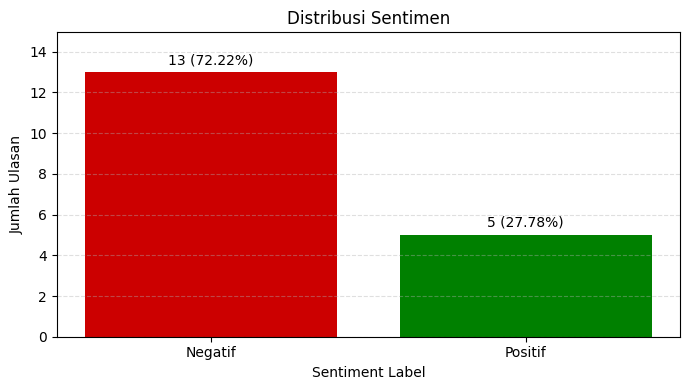

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hitung distribusi label
dist = df_filtered['sentiment_label'].value_counts().reset_index()
dist.columns = ['sentiment_label', 'jumlah']

# Hitung persentase
dist['persentase'] = (dist['jumlah'] / dist['jumlah'].sum() * 100).round(2)

# Urutkan label
dist = dist.sort_values('sentiment_label')

# Warna khusus:
# Positif = Hijau Muda (#90ee90)
# Negatif = Merah Muda (#ff9999)
colors = dist['sentiment_label'].map({
    'Positif': '#008000',   # hijau gelap
    'Negatif': '#cc0000'    # merah gelap
}).tolist()

# Plot
plt.figure(figsize=(7, 4))
plt.bar(dist['sentiment_label'], dist['jumlah'], color=colors)

# Format angka ribuan
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Grid halus
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Tambah ruang di atas bar
plt.ylim(0, dist['jumlah'].max() * 1.15)

# Label dan judul
plt.xlabel('Sentiment Label')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Sentimen')

# Tampilkan angka + persentase
for index, row in dist.iterrows():
    plt.text(index,
             row['jumlah'] + dist['jumlah'].max() * 0.03,
             f"{row['jumlah']} ({row['persentase']}%)",
             ha='center')

plt.tight_layout()
plt.show()

### Konversi Label Teks ke Label Numerik

Bagian kode ini digunakan untuk mengubah label sentimen yang semula berbentuk teks ("Positif" dan "Negatif") menjadi angka (1 dan 0). Model NLP seperti IndoBERT hanya dapat memproses label dalam bentuk numerik, sehingga proses mapping ini wajib dilakukan sebelum training.

In [23]:
label_mapping = {
    "Positif": 1,
    "Negatif": 0
}

df_filtered['sentiment_encoded'] = df_filtered['sentiment_label'].map(label_mapping)

# Cek hasil 10 data pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded
0,"QRIS sangat lemot, antrian panjang gara-gara a...","qris sangat lemot, antrian panjang gara-gara a...",qris sangat lemot antrian panjang garagara apl...,qris sangat lemot antrian panjang garagara apl...,"[qris, sangat, lemot, antrian, panjang, garaga...","[qris, lemot, antrian, garagara, aplikasi, tid...","[qris, lot, antri, garagara, aplikasi, tidak, ...",-3,Negatif,0
1,Saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,saya suka dengan fitur cicil emas yang sangat ...,"[saya, suka, dengan, fitur, cicil, emas, yang,...","[suka, fitur, cicil, emas, bermanfaat]","[suka, fitur, cicil, emas, manfaat]",1,Positif,1
2,"Beberapa kali aplikasi crash, semoga bisa sege...","beberapa kali aplikasi crash, semoga bisa sege...",beberapa kali aplikasi crash semoga bisa seger...,beberapa kali aplikasi crash semoga bisa seger...,"[beberapa, kali, aplikasi, crash, semoga, bisa...","[kali, aplikasi, crash, semoga, diperbaiki]","[kali, aplikasi, crash, moga, baik]",-1,Negatif,0
3,"Aplikasi sering lemot saat jam sibuk, agak men...","aplikasi sering lemot saat jam sibuk, agak men...",aplikasi sering lemot saat jam sibuk agak meng...,aplikasi sering lemot saat jam sibuk agak meng...,"[aplikasi, sering, lemot, saat, jam, sibuk, ag...","[aplikasi, lemot, jam, sibuk, mengganggu]","[aplikasi, lot, jam, sibuk, ganggu]",-3,Negatif,0
4,Proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat.,proses transaksi berjalan lancar dan cepat,proses transaksi berjalan lancar dan cepat,"[proses, transaksi, berjalan, lancar, dan, cepat]","[proses, transaksi, berjalan, lancar, cepat]","[proses, transaksi, jalan, lancar, cepat]",2,Positif,1
5,"Sistem keamanan cukup baik, membuat saya meras...","sistem keamanan cukup baik, membuat saya meras...",sistem keamanan cukup baik membuat saya merasa...,sistem keamanan cukup baik membuat saya merasa...,"[sistem, keamanan, cukup, baik, membuat, saya,...","[sistem, keamanan, aman]","[sistem, aman, aman]",-1,Negatif,0
6,"Transaksi QRIS selalu error, saldo kepotong ta...","transaksi qris selalu error, saldo kepotong ta...",transaksi qris selalu error saldo kepotong tap...,transaksi qris selalu error saldo kepotong tap...,"[transaksi, qris, selalu, error, saldo, kepoto...","[transaksi, qris, error, saldo, kepotong, pemb...","[transaksi, qris, error, saldo, potong, bayar,...",-1,Negatif,0
7,"Fitur QRIS jarang dipakai, tapi overall aplika...","fitur qris jarang dipakai, tapi overall aplika...",fitur qris jarang dipakai tapi overall aplikas...,fitur qris jarang dipakai tapi overall aplikas...,"[fitur, qris, jarang, dipakai, tapi, overall, ...","[fitur, qris, jarang, dipakai, overall, aplika...","[fitur, qris, jarang, pakai, overall, aplikasi...",-1,Negatif,0
8,Pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,pelayanan customer service sangat ramah dan ce...,"[pelayanan, customer, service, sangat, ramah, ...","[pelayanan, customer, service, ramah, cepat, t...","[layan, customer, service, ramah, cepat, tanggap]",1,Positif,1
9,"Bagus sekali, transaksi jadi lebih efisien.","bagus sekali, transaksi jadi lebih efisien.",bagus sekali transaksi jadi lebih efisien,bagus sekali transaksi jadi lebih efisien,"[bagus, sekali, transaksi, jadi, lebih, efisien]","[bagus, transaksi, efisien]","[bagus, transaksi, efisien]",2,Positif,1


### Contoh 5 Data Positif dan Negatif

In [24]:
# === Contoh 5 Data Positif ===
contoh_positif = (
    df_filtered[df_filtered['sentiment_encoded'] == 1]
    .head(5)
)

print("=== Contoh Ulasan Positif ===")
display(contoh_positif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])


# === Contoh 5 Data Negatif ===
contoh_negatif = (
    df_filtered[df_filtered['sentiment_encoded'] == 0]
    .head(5)
)

print("=== Contoh Ulasan Negatif ===")
display(contoh_negatif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])

=== Contoh Ulasan Positif ===


,normalisasi,sentiment_label,sentiment_encoded
1,saya suka dengan fitur cicil emas yang sangat ...,Positif,1
4,proses transaksi berjalan lancar dan cepat,Positif,1
8,pelayanan customer service sangat ramah dan ce...,Positif,1
9,bagus sekali transaksi jadi lebih efisien,Positif,1
12,sayang sekali notifikasi transaksi sering terl...,Positif,1


=== Contoh Ulasan Negatif ===


,normalisasi,sentiment_label,sentiment_encoded
0,qris sangat lemot antrian panjang garagara apl...,Negatif,0
2,beberapa kali aplikasi crash semoga bisa seger...,Negatif,0
3,aplikasi sering lemot saat jam sibuk agak meng...,Negatif,0
5,sistem keamanan cukup baik membuat saya merasa...,Negatif,0
6,transaksi qris selalu error saldo kepotong tap...,Negatif,0


### Wordcloud Positif dan Negatif

#### Wordcloud Positif

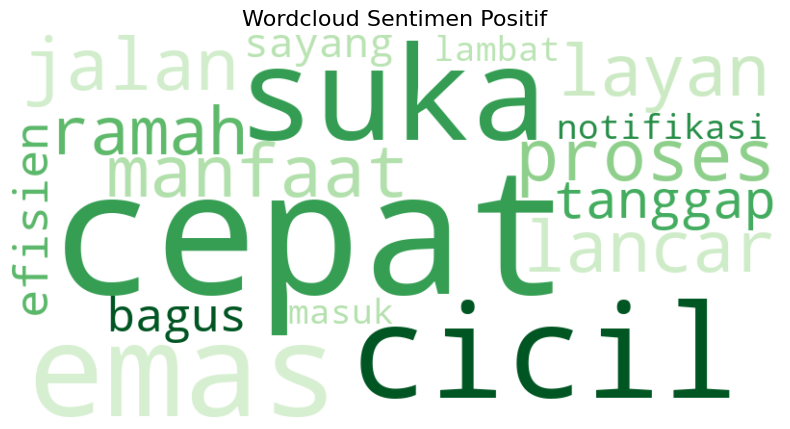

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# stopword tambahan
stopword_wc = {
    "bsi", "byond", "bank", "syariah",
    "aplikasi", "apk", "byondbybsi",
    "nya", "juga", "udah",
    "gak", "ga", "cont", "tidak",
    "sih", "saja", "aja",
    "untuk", "banget", "kali",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update",
    "customer", "service", "cs",
    "fitur", "login", "akun", "email",
    "transaksi", "rekening", "mobile"
}

wc_stopwords = STOPWORDS.union(stopword_wc)

# ambil token positif
positive_tokens = df_filtered[
    df_filtered['sentiment_encoded'] == 1
][token_col]

# pastikan isinya list
positive_tokens = positive_tokens.dropna().apply(
    lambda x: x if isinstance(x, list) else []
)

# gabungkan token
text_pos = " ".join(" ".join(tokens) for tokens in positive_tokens)

# wordcloud
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greens",
    stopwords=wc_stopwords,
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Wordcloud Sentimen Positif", fontsize=16)
plt.axis("off")
plt.show()

#### 5 Kata Teratas

In [26]:
from collections import Counter
import pandas as pd
from wordcloud import STOPWORDS

# minimal stopwords kalau wc_stopwords belum ada
if 'wc_stopwords' not in globals():
    wc_stopwords = STOPWORDS

# rapikan nama kolom
df_filtered.columns = df_filtered.columns.str.strip()

# pastikan sentiment_encoded ada
if 'sentiment_encoded' not in df_filtered.columns:
    if 'sentiment_label' in df_filtered.columns:
        df_filtered['sentiment_encoded'] = df_filtered['sentiment_label'].map({'Positif': 1, 'Negatif': 0})
    else:
        raise KeyError("Tidak ada kolom 'sentiment_encoded' atau 'sentiment_label'.")

# pilih kolom token
token_col = None
for c in ['stemming', 'stopword_removal', 'tokenisasi']:
    if c in df_filtered.columns:
        token_col = c
        break
if token_col is None:
    raise KeyError("Tidak ada kolom token: 'stemming', 'stopword_removal', atau 'tokenisasi'.")

# 1. Ambil data sentimen positif
data_positif = df_filtered.loc[df_filtered['sentiment_encoded'] == 1, token_col]

# 2. Pastikan tiap baris benar-benar list token
data_positif = data_positif.dropna().apply(lambda x: x if isinstance(x, list) else [])

# 3. Gabungkan seluruh token + filter stopword + panjang kata
all_words = [
    word
    for tokens in data_positif
    for word in tokens
    if isinstance(word, str) and word not in wc_stopwords and len(word) > 2
]

# 4. Hitung frekuensi & ambil top 5
top_5_words = Counter(all_words).most_common(5)

# 5. Tabel hasil
df_top_5 = pd.DataFrame(top_5_words, columns=['kata', 'jumlah_kemunculan'])
df_top_5

,kata,jumlah_kemunculan
0,cepat,2
1,suka,1
2,cicil,1
3,emas,1
4,manfaat,1


#### Wordcloud Negatif

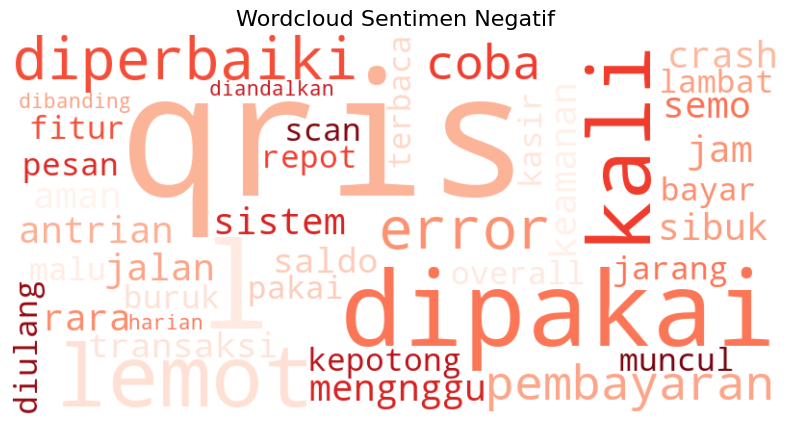

In [27]:
# === Wordcloud Negatif ===
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Stopword tambahan khusus wordcloud (hindari kata tidak bermakna)
stopword_wc = {
    "bsi", "byond", "byond!", "bank", "syariah",
    "aplikasi", "apk", 'tidak',
    "nya", "juga", "udah", "bagus",
    "gak", "ga", "cont", "min",
    "sih", "saja", "aja",
    "untuk", "banget", "mengataskanamakan",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update"
}

# Gabungkan token negatif menjadi satu teks panjang
text_neg = " ".join(
    [" ".join(tokens) for tokens in df_filtered[df_filtered['sentiment_encoded'] == 0]['stopword_removal']]
)

# Hapus kata tidak penting
for sw in stopword_wc:
    text_neg = text_neg.replace(sw, "")

# Generate WordCloud negatif
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",       # warna merah lembut → cocok untuk negatif
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_neg)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Wordcloud Sentimen Negatif", fontsize=16)
plt.axis("off")
plt.show()

#### 5 Kata Teratas

In [28]:
from collections import Counter
import pandas as pd

# 1. Ambil data sentimen negatif
data_negatif = df_filtered[
    df_filtered['sentiment_encoded'] == 0
]['stopword_removal']

# 2. Gabungkan seluruh token
all_words_neg = [
    word
    for tokens in data_negatif
    for word in tokens
    if word not in stopword_wc and len(word) > 2
]

# 3. Hitung frekuensi kata
word_freq_neg = Counter(all_words_neg)

# 4. Ambil 5 kata teratas
top_5_words_neg = word_freq_neg.most_common(5)

# 5. Jadikan tabel
df_top_5_neg = pd.DataFrame(
    top_5_words_neg,
    columns=['kata', 'jumlah_kemunculan']
)

df_top_5_neg

,kata,jumlah_kemunculan
0,qris,10
1,gagal,4
2,dipakai,3
3,lemot,2
4,kali,2
